In [23]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
f = open("training.log", "r")
s = f.readlines()
f.close()

In [13]:
s

['INFO:root:Train Epoch: 1 [0/64000 (0%)]\tLoss: 1426.042480\n',
 'INFO:root:Train Epoch: 1 [600/64000 (10%)]\tLoss: 616.298096\n',
 'INFO:root:Train Epoch: 1 [1200/64000 (20%)]\tLoss: 1016.840515\n',
 'INFO:root:Train Epoch: 1 [1800/64000 (30%)]\tLoss: 795.489136\n',
 'INFO:root:Train Epoch: 1 [2400/64000 (40%)]\tLoss: 830.345215\n',
 'INFO:root:Train Epoch: 1 [3000/64000 (50%)]\tLoss: 656.226440\n',
 'INFO:root:Train Epoch: 1 [3600/64000 (60%)]\tLoss: 575.307861\n',
 'INFO:root:Train Epoch: 1 [4200/64000 (70%)]\tLoss: 518.412964\n',
 'INFO:root:Train Epoch: 1 [4800/64000 (80%)]\tLoss: 499.617554\n',
 'INFO:root:Train Epoch: 1 [5400/64000 (90%)]\tLoss: 526.785522\n',
 'INFO:root:Train Epoch: 1  Batch loss:846.6341910858155\n',
 'INFO:root:Train Epoch: 2 [0/64000 (0%)]\tLoss: 506.866272\n',
 'INFO:root:Train Epoch: 2 [600/64000 (10%)]\tLoss: 545.762695\n',
 'INFO:root:Train Epoch: 2 [1200/64000 (20%)]\tLoss: 1216.197998\n',
 'INFO:root:Train Epoch: 2 [1800/64000 (30%)]\tLoss: 1203.0136

In [20]:
sn = np.array(s)
s_mask = np.array(['Batch loss' in line for line in s])

In [22]:
loss = sn[s_mask]


In [36]:
loss_n = [ re.search('Batch loss:(.*)\n',line).group(1) for line in loss]
loss_array = np.array(loss_n, dtype='float32')

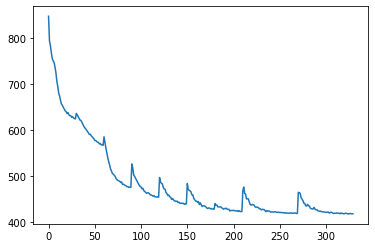

In [37]:
plt.plot(loss_array)